In [4]:
# Author : Abhyuday Tripathi
# Date :  23-03-2020
# Ref. Book : Reinforcement Learning An Introduction
import numpy as np
import seaborn as sns;sns.set()
import matplotlib.pyplot as plt


In [18]:
# Bandit Class
class Bandit:
    def __init__(self,arms,mu=0,sigma=1,mean_rewards=None,alpha=0.8,dist="normal"):
        self.arms = arms  # possible actions 
        self.sigma = sigma # standard deviation for reward distribution
        self.Q = np.zeros(self.arms) # Q(a) i.e. estimated expected mean rewards
        self.actions = np.zeros(self.arms) # action history
        self.dist =dist # distribution for rewards
        
        
        # stationary or non-stationary distribution
        if mean_rewards is None:
            prob = np.random.randn()
            self.mean_rewards = np.zeros(self.arms)+prob  
            self.type = "nonstat"
            self.alpha =alpha
        else:
            self.mean_rewards = np.array(mean_rewards)
            self.type = "stat"
            
    # exploit vs. explore    
    def play(self,epsilon):
        
        prob = np.random.rand()
        if epsilon > prob : # explore
            action = np.random.choice(self.arms)
        else:
            action = np.argmax(self.Q) # exploit
        self.actions[action]+=1 # increase action counter
        
        return action
    
    # Reward
    def get_reward(self,action):
        # Reward distribution is Normal(q* , sigma)
        if(self.dist=="normal"):
            # Reward is from Distribution Normal(q*[action],sigma)
            if self.type=="stat":
                reward = self.mean_rewards[action] + np.random.randn()*self.sigma
            else:
                # In case of Non Stationary reward 
                # mean-rewards incremented with Gaussian noise with mu = 0 sigma = 0.01
                self.mean_rewards+=np.random.normal(loc=0,scale=0.01,size=self.arms)
                reward = np.random.normal(loc=self.mean_rewards[action], scale=1)
        
        else:
            # Reward Distribution is Binomial
            rand = np.random.rand()
            if self.mean_rewards[action]>=rand:
                reward = 1
            else:
                reward = 0
        return reward
    
    # Incremental Update
    def updateQ(self,reward,action):
        # In case of Stationary Distribution
        if(self.type=="stat"):
            self.Q[action]+=(1./self.actions[action])*(reward-self.Q[action])
        # In case of Non-Stationary Distribution
        else:
            x = self.alpha*(reward-self.Q[action])
            self.Q[action]=self.Q[action] + x
            
    
            

In [25]:
def experiment(iters,agent,epsilon):
    # History 
    log=[]
    
    for i in range(iters):
        action = agent.play(epsilon) # action taken with Epsilon probability
        reward = agent.get_reward(action) # Reward for taken action
        agent.updateQ(reward,action) # Update Bandit's Q  i.e. Estimated Average Reward for Action
        log.append(reward) # update History
    return np.array(log)


In [26]:
if __name__=="__main__":
    # Testbed size
    epochs = 2000
    Bandit1Res = np.zeros(1000) 
    Bandit2Res = np.zeros(1000)
    
    for i in range(epochs):
        # Bandit 1
        Bandit1 = Bandit(2,mean_rewards=[0.1,0.2],dist="binomial")
        Bandit1Res+=experiment(1000,Bandit1,0.1)
        
        # Bandit 2
        Bandit2 = Bandit(2,mean_rewards=[0.8,0.9],dist="binomial")
        Bandit2Res+=experiment(1000,Bandit2,0.1)
        
    Bandit1Res = Bandit1Res/epochs # Bandit1 average reward
    Bandit2Res = Bandit2Res/epochs # Bandit2 average reward
    

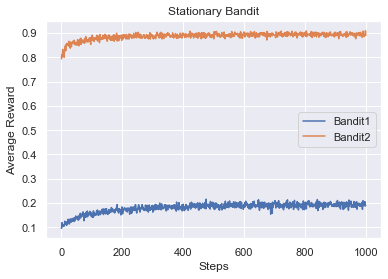

In [43]:
plt.title("Stationary Bandit")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
sns.lineplot(data=Bandit1Res,legend="brief",label="Bandit1")
sns.lineplot(data=Bandit2Res,legend="brief",label="Bandit2")

plt.show()

In [22]:
if __name__=="__main__":
    # Testbed size
    epochs = 2000
    
    res = np.zeros(10000)
    res2 = np.zeros(10000)
    for i in range(epochs):
        # Bandit with non-stationary reward distribution
        b1 = Bandit(10) # 10 arm bandit
        res+=experiment(10000,b1,0.1) # 10000 time steps with epsilon 0.1
        
        b2 = Bandit(10,alpha=0.2) # 10 arm bandit
        res2+=experiment(10000,b2,0.1) # 10000 time steps with epsilon 0.1
        
      
    res = res/epochs # average reward over time
    res2 = res2/epochs
    
    

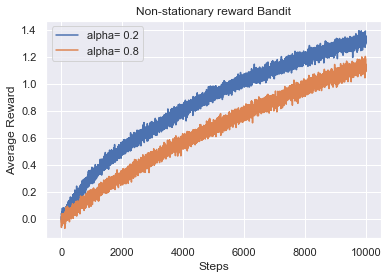

In [42]:
plt.title("Non-stationary reward Bandit")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
sns.lineplot(data=res2,legend="brief",label="alpha= 0.2")
sns.lineplot(data=res,legend="brief",label="alpha= 0.8")


plt.show()
